In [1]:
import pandas as pd
import nltk
import spacy
import os
import seaborn as sns
##nltk.download('omw-1.4')
##nltk.download('wordnet')
from nltk import WordNetLemmatizer
from spacy.lang.en import English

In [2]:
filename = "train.csv"
filepath = "D:\\downloads\\a\\"
file = filepath+filename
authorset = pd.read_csv(file,encoding="ISO-8859-1")
authorset.head() ##displays the first five rows of the dataframe by default

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


<AxesSubplot:xlabel='author', ylabel='count'>

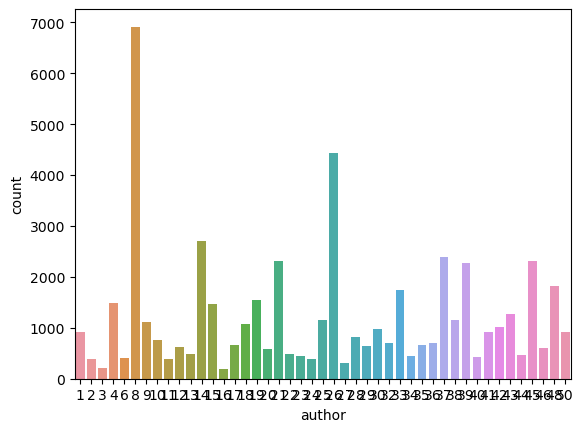

In [3]:
sns.countplot(data=authorset, x='author') ##occurrence(counts) of the observation

In [113]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from textblob import Word
tokenizer = RegexpTokenizer(r'\w+')
stopword = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

authorset['text'] = authorset['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
authorset['text'] = authorset['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

authorset.head()

,text,author
0,ou time listen give entire story said may form...,1
1,wish solitude twenty year age possession perfe...,1
2,skirt blew perfect freedom upper part wore hat...,1
3,san row shop opposite impressed upon vision la...,1
4,hour walk tiresome three sensible english town...,1


In [59]:
author = authorset.groupby("author")

# word frequency by author
wordfreqAuthor = nltk.probability.ConditionalFreqDist()

for name, group in author:
    #sentences into a single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    #tokens    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    #frequency of tokens
    frequency = nltk.FreqDist(tokens)
    wordfreqAuthor[name] = (frequency)
    
#frequency of words for authors.     

In [60]:
print(wordfreqAuthor[1].freq('time'))

0.006368672210390233


In [61]:
for i in wordfreqAuthor.keys():
    print("time: " + str(i) + " Author")
    print(wordfreqAuthor[i].freq('time'))
print()

time: 1 Author
0.006368672210390233
time: 2 Author
0.004660283633485526
time: 3 Author
0.005555862373667642
time: 4 Author
0.0040206274307267335
time: 6 Author
0.0032959535155003355
time: 8 Author
0.005361597692272
time: 9 Author
0.0035598452659266516
time: 10 Author
0.0037053135838194216
time: 11 Author
0.0064645827584847645
time: 12 Author
0.0034702947912492693
time: 13 Author
0.004424799435569407
time: 14 Author
0.003250088833521361
time: 15 Author
0.004314335205297842
time: 16 Author
0.0034349138826750766
time: 17 Author
0.0036613802790012684
time: 18 Author
0.003566836014081835
time: 19 Author
0.003212406687397471
time: 20 Author
0.0034481370176909195
time: 21 Author
0.00598404321094519
time: 22 Author
0.006017362792950557
time: 23 Author
0.004184120357794711
time: 24 Author
0.006089373630774305
time: 25 Author
0.003931521059174737
time: 26 Author
0.004846203244148288
time: 27 Author
0.004040782667366369
time: 28 Author
0.0032224377144562137
time: 29 Author
0.004161444496035806
ti

In [123]:
testSentence = "wish for solitude he was twenty years of age and in the possession of perfect health most youths like him would have the stillness of the and welcomed joyfully the first signs of that awakening that would come with the sunrise was sentimental the strangeness of the situation gave him a real delight he lay back in the comfortable seat stretched his legs and gave himself up to reverie his brain dwelt on the poetic quality of this peculiar place its history of which he had read much passed slowly through his mind he wished he had lived some centuries earlier to have seen these islands when the of the whole world came there with treasures of distant lands and when st mark s held a gorgeous from one year s end to another s in a to enjoy thoroughly one must himself into that dead and buried past for to day only the shadow of the mighty substance is left the young man had watched the litter of leaning from stately he saw that decay had fastened upon the of this glorious creature on whose breast he had been permitted too late to rest his head to appreciate he must forget the present the morning hour just before the sun comes out of the is the best time for this the grand canal is some hundreds of feet in width during the major part of its course the streets are seldom more than twenty when an hour had passed and the sun was peeping over the rosy tints of the east the passenger lifted a hand without turning in his seat and intimated that he would vary his course by entering one of the side streams he nodded still without turning when the said in an tone they understood each other very well and with a sweep of the long oar that bore no apparent relation to the effect it gave the italian turned his in the direction indicated and with another sent his between the high of buildings that bordered the the light on the outer world had little effect as yet on these secluded passages the undisturbed quality of the voyage was if anything improved by the change so little prospect was there of another approaching from the opposite direction that s forgot to utter his usual cry at the doubtful corners love gone astray the that seemed to offer a succession of impossible turns for the long craft proved equal to its passage in the of the whose art was little less than he found plenty of room where none was visible not even the walls with either end of his boat and all without the least apparent effort if anything was needed to make the young american certain he had passed from earth to the magic perfection of these difficult passages under numerous little arched bridges he floated and when at last he emerged upon the grand canal he uttered the word he had heard and was immediately rowed again into a succession of the minor ones finally the march of the early morning began to have its effect in various ways through windows women could be seen preparing other came toward the from which passengers might be expected market boats loaded high with the brightest potatoes and fruit appeared young people were seen as the public squares were passed going to labor beggars thought it not too early to their trade the most flourishing and perhaps the most in shutters were taken down from dingy shops and goods arranged to the expected customer services in the churches of which the city more than a hundred attracted those who had the time and inclination for them the city was awakening gray s beautiful dream was being spoiled he roused himself with impatience for he would have preferred that m a the reverie had gone on for some hours longer the morning had been slightly chilly for the date was late in october but the warmly dressed youth had experienced no discomfort the was now mounting slowly but surely and the less fortunate who had no means to purchase fuel were crawling out into the sunshine like a species of there were months before them of colder nights than these and they had not yet begun to the very poor are your true and the more ignorant of these people knew though they might not have been able to put it into words that what must be must be somewhat gray to his that he would return to the waters of the grand canal if was indeed awake she would look better he thought from that point the main street of the city repaid him for the change in the glowing colors reflected from her palace walls as the of the sun came in contact with the shades that art and time have combined to render lovely other foreigners were out now as well as himself taking what they thought a very early view of the city he marked the various types of and looked rather longer than was quite polite at a party of young girls by a sour faced and elderly female that they were english he made sure by the glowing color of their cheeks as well as by the peculiar fashion of their hair and the of their then his attention was attracted by an italian girl hardly more than fifteen years of age who the forward oar in a boat that transported love gone astray baskets of coal from one of the to the shore the girl was strikingly pretty with the dark hair and eyes of her race and there was a freedom in the way she moved her arms that would have given pleasure to a painter she apparently boasted but one garment a printed gown that came only to her knees and was loosely fastened at the breast the lower portion of her brown legs was entirely uncovered"
# tokenize test sentence
tokSent = nltk.tokenize.word_tokenize(testSentence)

## frequences of the test sentence's words for authors
senProb = []
for i in wordfreqAuthor.keys():
    for j  in tokSent:
        wordFreq = wordfreqAuthor[i].freq(j)
        rounded = wordFreq+0.00001 ##for to not be 0
        senProb.append((i, j, rounded))
        
senProbdf = pd.DataFrame(senProb, columns=('Author', 'Word', 'Probability'))  
senProbdf.head()

,Author,Word,Probability
0,1,wish,0.001622
1,1,for,0.000010
2,1,solitude,0.000028
3,1,he,0.000010
4,1,was,0.000010


In [130]:
senAuthor = []
##frequences product for test sentence
for i in wordfreqAuthor.keys():
    oneAuthor = senProbdf.loc[senProbdf['Author'] == i]
    print(oneAuthor)
    probability = (oneAuthor.product(numeric_only = True)[0]) / i   
    ##since it multiplies with all numeric, authors are numeric too, so there is a problem
    
    ##probab = oneAuthor[["Probability"]].product()
    
    senAuthor.append((i, probability))
    
senAuthordf = pd.DataFrame(senAuthor, columns=('Author','Probability'))

##result
print("The author is: ")
print(senAuthordf.loc[senAuthordf['Probability'].idxmax(),'Author'])
senAuthordf.head()

     Author       Word  Probability
0         1       wish     0.001622
1         1        for     0.000010
2         1   solitude     0.000028
3         1         he     0.000010
4         1        was     0.000010
..      ...        ...          ...
995       1      brown     0.000103
996       1       legs     0.000010
997       1        was     0.000010
998       1   entirely     0.000499
999       1  uncovered     0.000023

[1000 rows x 3 columns]
      Author       Word  Probability
1000       2       wish     0.000849
1001       2        for     0.000010
1002       2   solitude     0.000057
1003       2         he     0.000010
1004       2        was     0.000010
...      ...        ...          ...
1995       2      brown     0.000211
1996       2       legs     0.000010
1997       2        was     0.000010
1998       2   entirely     0.000152
1999       2  uncovered     0.000040

[1000 rows x 3 columns]
      Author       Word  Probability
2000       3       wish     0.000872


,Author,Probability
0,1,1.000000e+00
1,2,0.000000e+00
2,3,2.067769e+18
3,4,0.000000e+00
4,6,0.000000e+00
